# Хакатон: палеоклиматологические исследования ледяных кернов

## Часть первая: Содержание CO$_2$

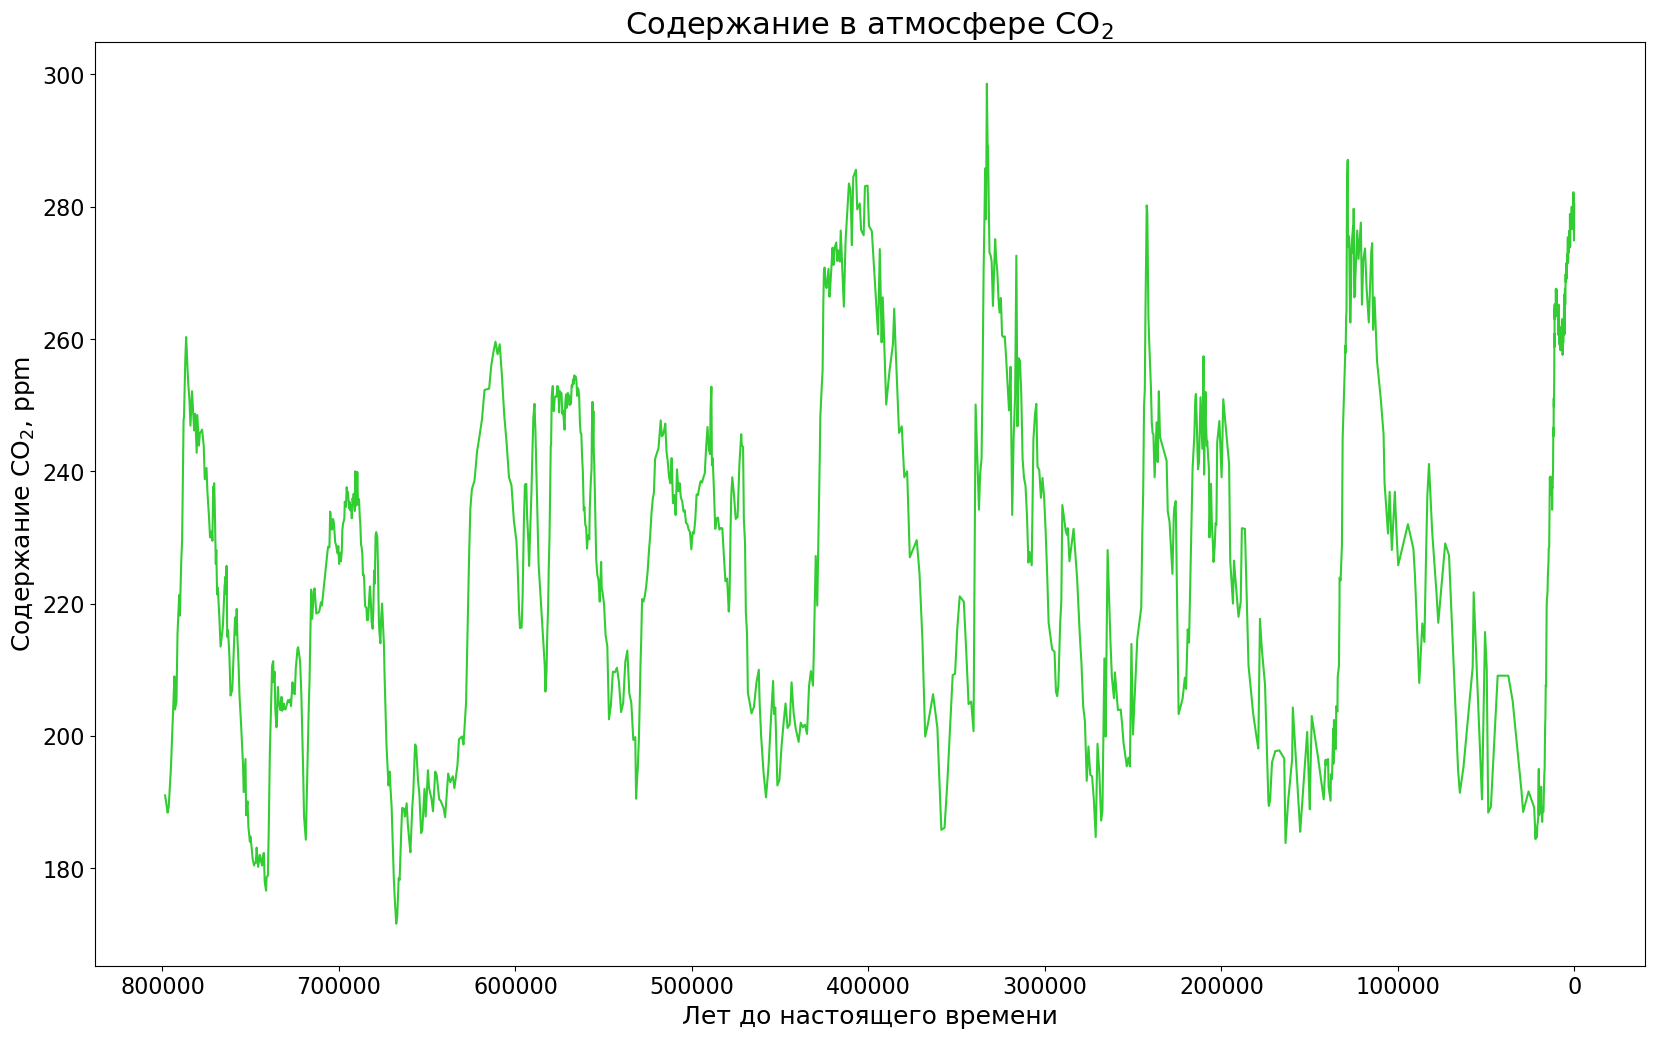

In [25]:
import matplotlib.pyplot as plt
import numpy as np

ageBP_1, CO2 = np.loadtxt('data/epica.txt', unpack=True)
plt.figure(figsize = (20,12))
plt.plot(ageBP_1, CO2, color = 'limegreen')

plt.title('Содержание в атмосфере СО$_2$', fontsize=22)
plt.xlabel('Лет до настоящего времени',fontsize=18)     
plt.ylabel('Содержание СО$_2$, ppm', fontsize=18)            
plt.gca().tick_params(labelsize=16) 
plt.gca().invert_xaxis()

## Часть вторая: Температурные реконструкции по Гренландии и события Dansgaard Oeschger (DO)

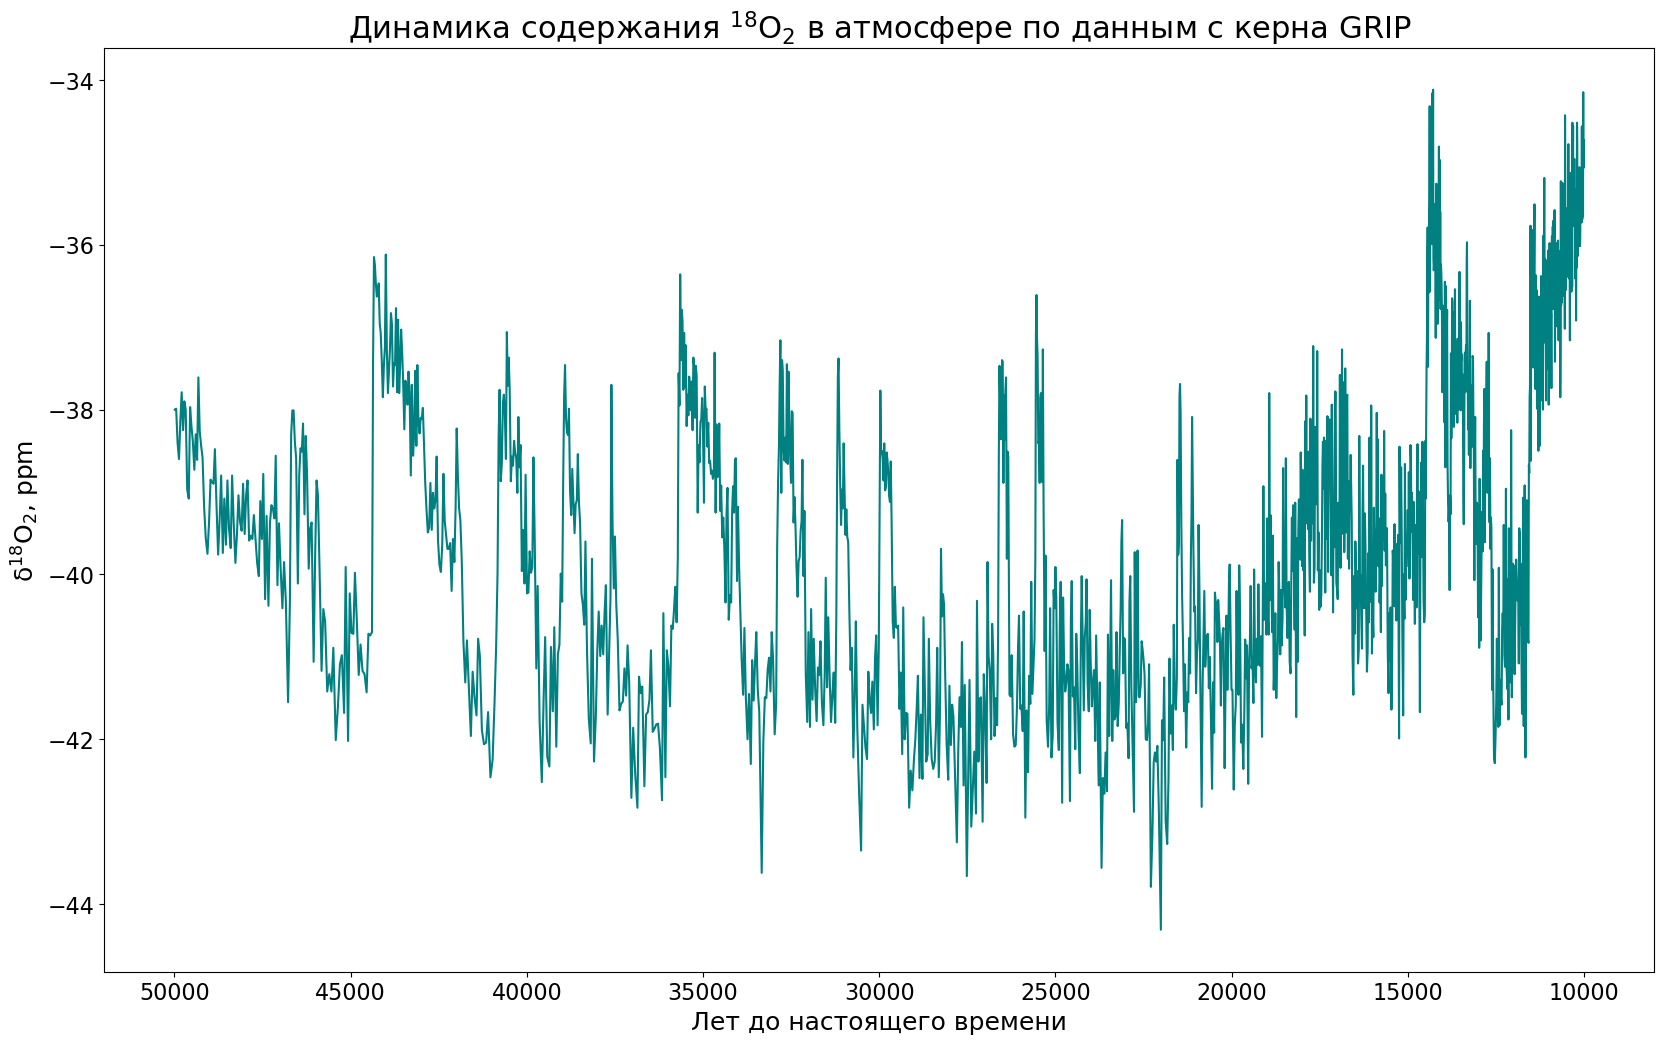

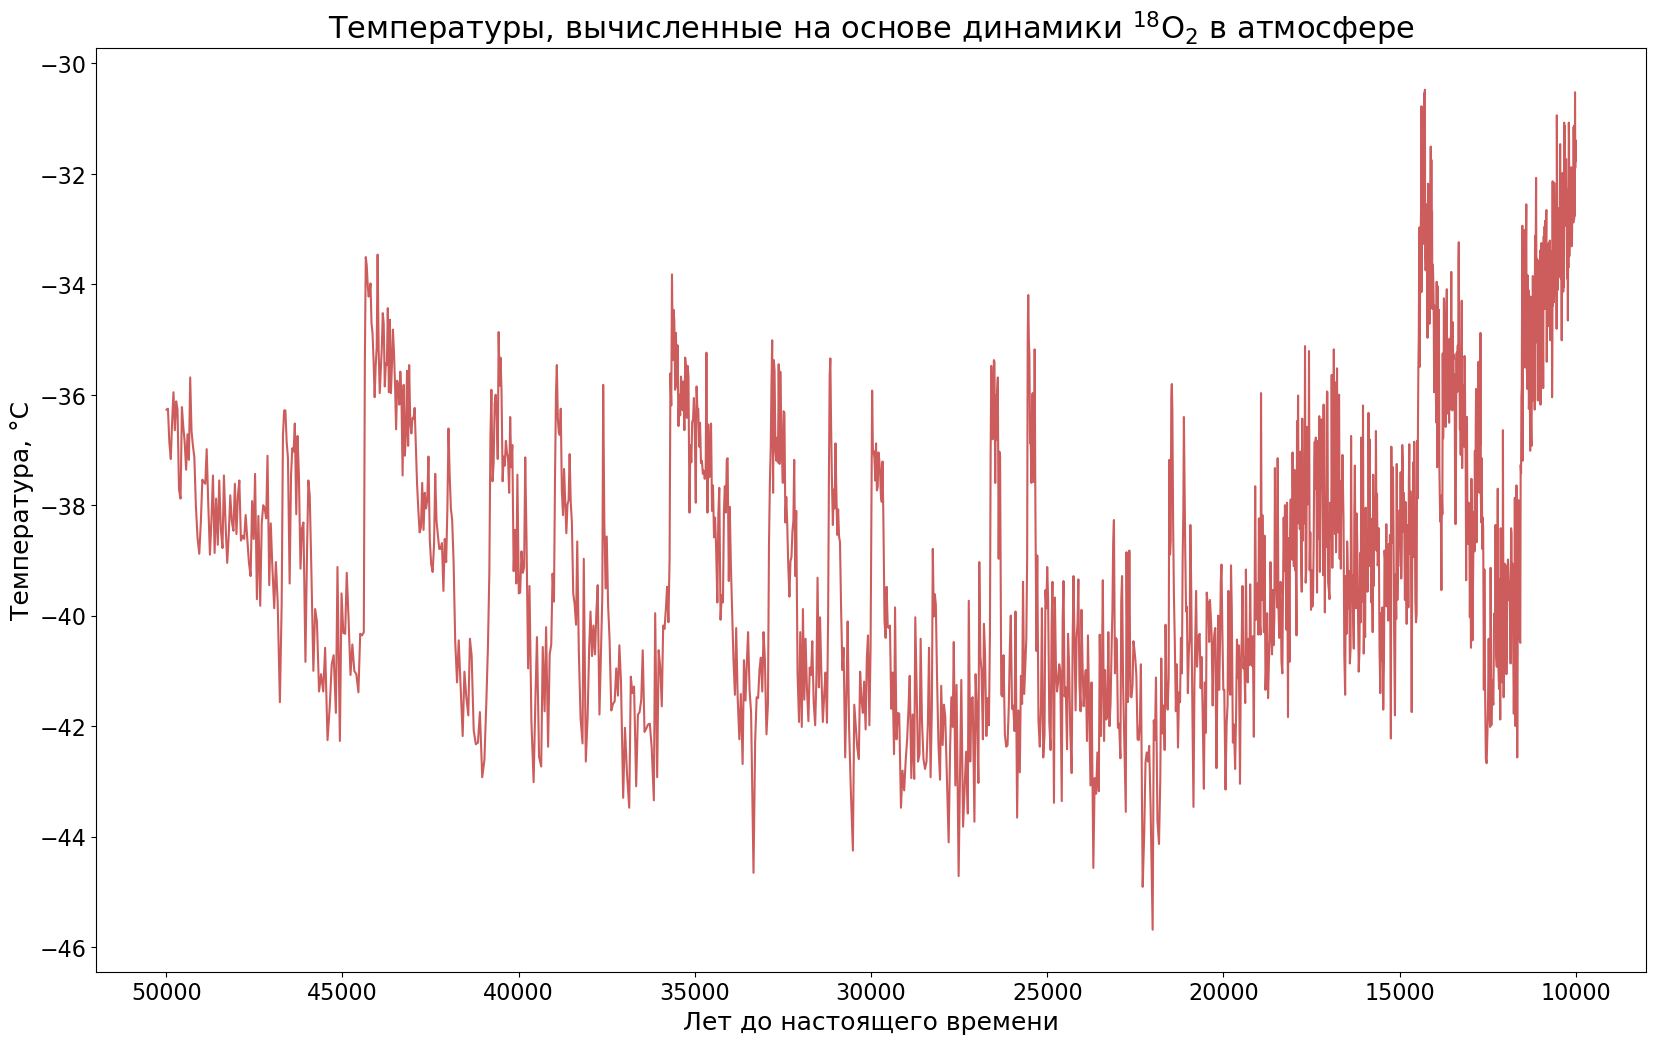

In [26]:
depth_o, o2, ageBP = np.loadtxt('data/gripd18o.txt', unpack=True, skiprows=36)
mask = ((ageBP > 10000) & (ageBP < 50000))
tvalues = []
for value in o2:
    t = (13.7 + value) / 0.67
    tvalues.append(t)
tvalues = np.array(tvalues)

plt.figure(figsize=(20,12))
plt.plot(ageBP[mask], o2[mask], color = 'teal')

plt.title('Динамика содержания $^{18}$O$_2$ в атмосфере по данным с керна GRIP', fontsize=22) 
plt.xlabel('Лет до настоящего времени', fontsize=18)
plt.ylabel('δ$^{18}$O$_2$, ppm', fontsize=18)
plt.gca().invert_xaxis()
plt.gca().tick_params(labelsize=16)

plt.figure(figsize=(20,12))
plt.plot(ageBP[mask], tvalues[mask], color='indianred')

plt.title('Температуры, вычисленные на основе динамики $^{18}$O$_2$ в атмосфере', fontsize=22) 
plt.xlabel('Лет до настоящего времени', fontsize=18)
plt.ylabel('Температура, °C', fontsize=18)
plt.gca().invert_xaxis()
plt.gca().tick_params(labelsize=16)

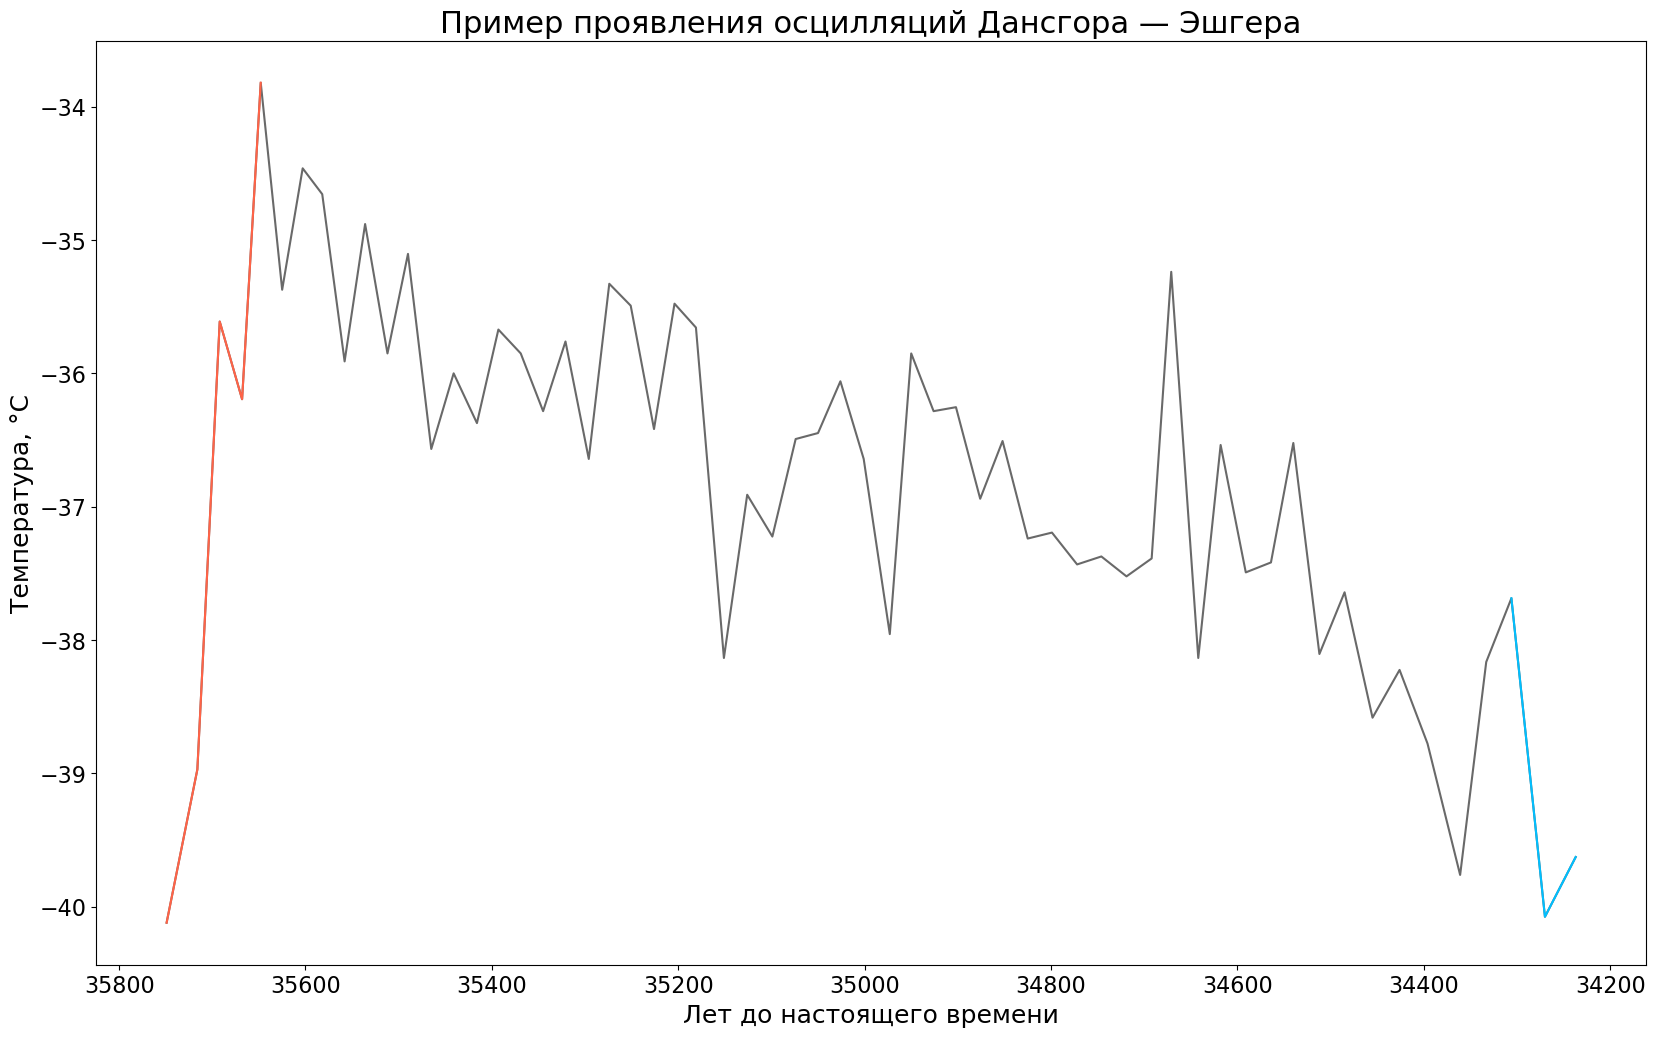

In [27]:
DO = ((ageBP > 34230) & (ageBP < 35760))
warming = ((ageBP > 35640) & (ageBP < 35760))
coldsnap = ((ageBP > 34230) & (ageBP < 34330))

plt.figure(figsize=(20,12))
plt.plot(ageBP[DO], tvalues[DO], color='dimgrey')
plt.plot(ageBP[warming], tvalues[warming], color='tomato')
plt.plot(ageBP[coldsnap], tvalues[coldsnap], color='deepskyblue')

plt.title('Пример проявления осцилляций Дансгора — Эшгера', fontsize=22) 
plt.xlabel('Лет до настоящего времени', fontsize=18)
plt.ylabel('Температура, °C', fontsize=18)
plt.gca().tick_params(labelsize=16)
plt.gca().invert_xaxis()

На сколько градусов повысилась температура и за какой срок?
>В данном случае температура повысилась на ~6 градусов в промежуток с 35740 по 35640 лет до настоящего времени.

Сколько времени потребовалось чтобы снова похолодало до уровня ледникового периода?
>Понижение температуры до прежних значений происходило постепенно, так что вновь температуру ~-40 градусов можно наблюдать в 34250-х годах, что соответствует продолжительности цикла в 1500 лет.

## Часть третья: История оледенений. Температура и CO$_2$
Какие единицы измерения различных параметров? 
>- ztop - глубина залегания, метры; 
>- Age - возраст, годы до 1950; 
>- Deuterium - данные о дейтериевом изотопе, промилле относительно SMOW (стандартное среднее значение для воды в океане)
>- Temperature - разница температуры относительно среднего значения за последние 1000 лет, градусы Цельсия

Определите связь температуры и изотопного состава
> Пониженные значения дейтерия совпадают с периодами похолоданий (до - 10°C при значениях -440...-450‰). Повышенные значения, наоборот, - с периодами потеплений (до +5.5°C при значениях -360...-370‰). Таким образом, между содержанием дейтерия и температурой существует прямая взаимосвязь

Какое разрешение данных? 
>☝️ 55 сантиметров

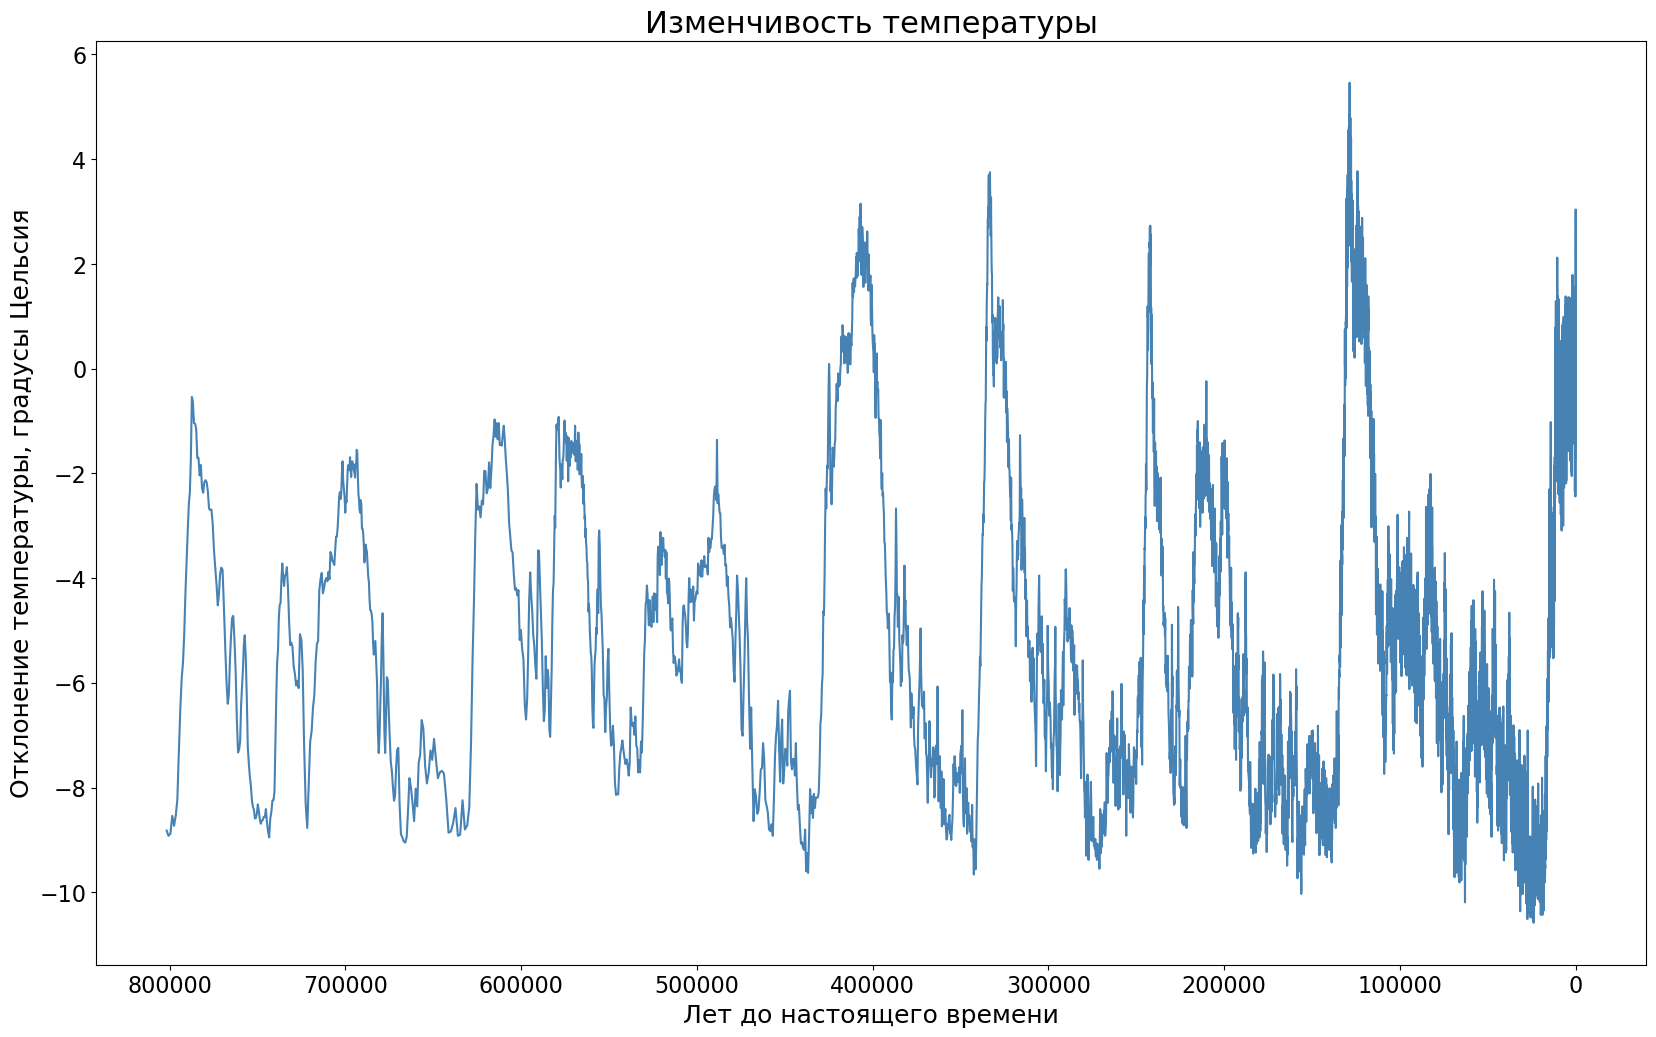

In [28]:
bag, ztop, age, deuterium, temp = np.loadtxt('data/edc3deuttemp2007.txt', unpack=True)

plt.figure(figsize = (20,12))
plt.plot(age, temp, color = 'steelblue')

plt.title('Изменчивость температуры', fontsize=22)
plt.xlabel('Лет до настоящего времени', fontsize=18)
plt.ylabel('Отклонение температуры, градусы Цельсия', fontsize=18) 
plt.gca().tick_params(labelsize=16)
plt.gca().invert_xaxis()

Сколько крупных переходов от ледниковья к межледниковью вы выделяете? 
>Можно выделить около 11 крупных переходов при планке «крупности» перехода в ΔT = 6-7 градусов

Определите перепад температуры межледниковых и ледниковых эпох:       
>☝️ перепад температур составляет от 6-7 до 14 градусов 

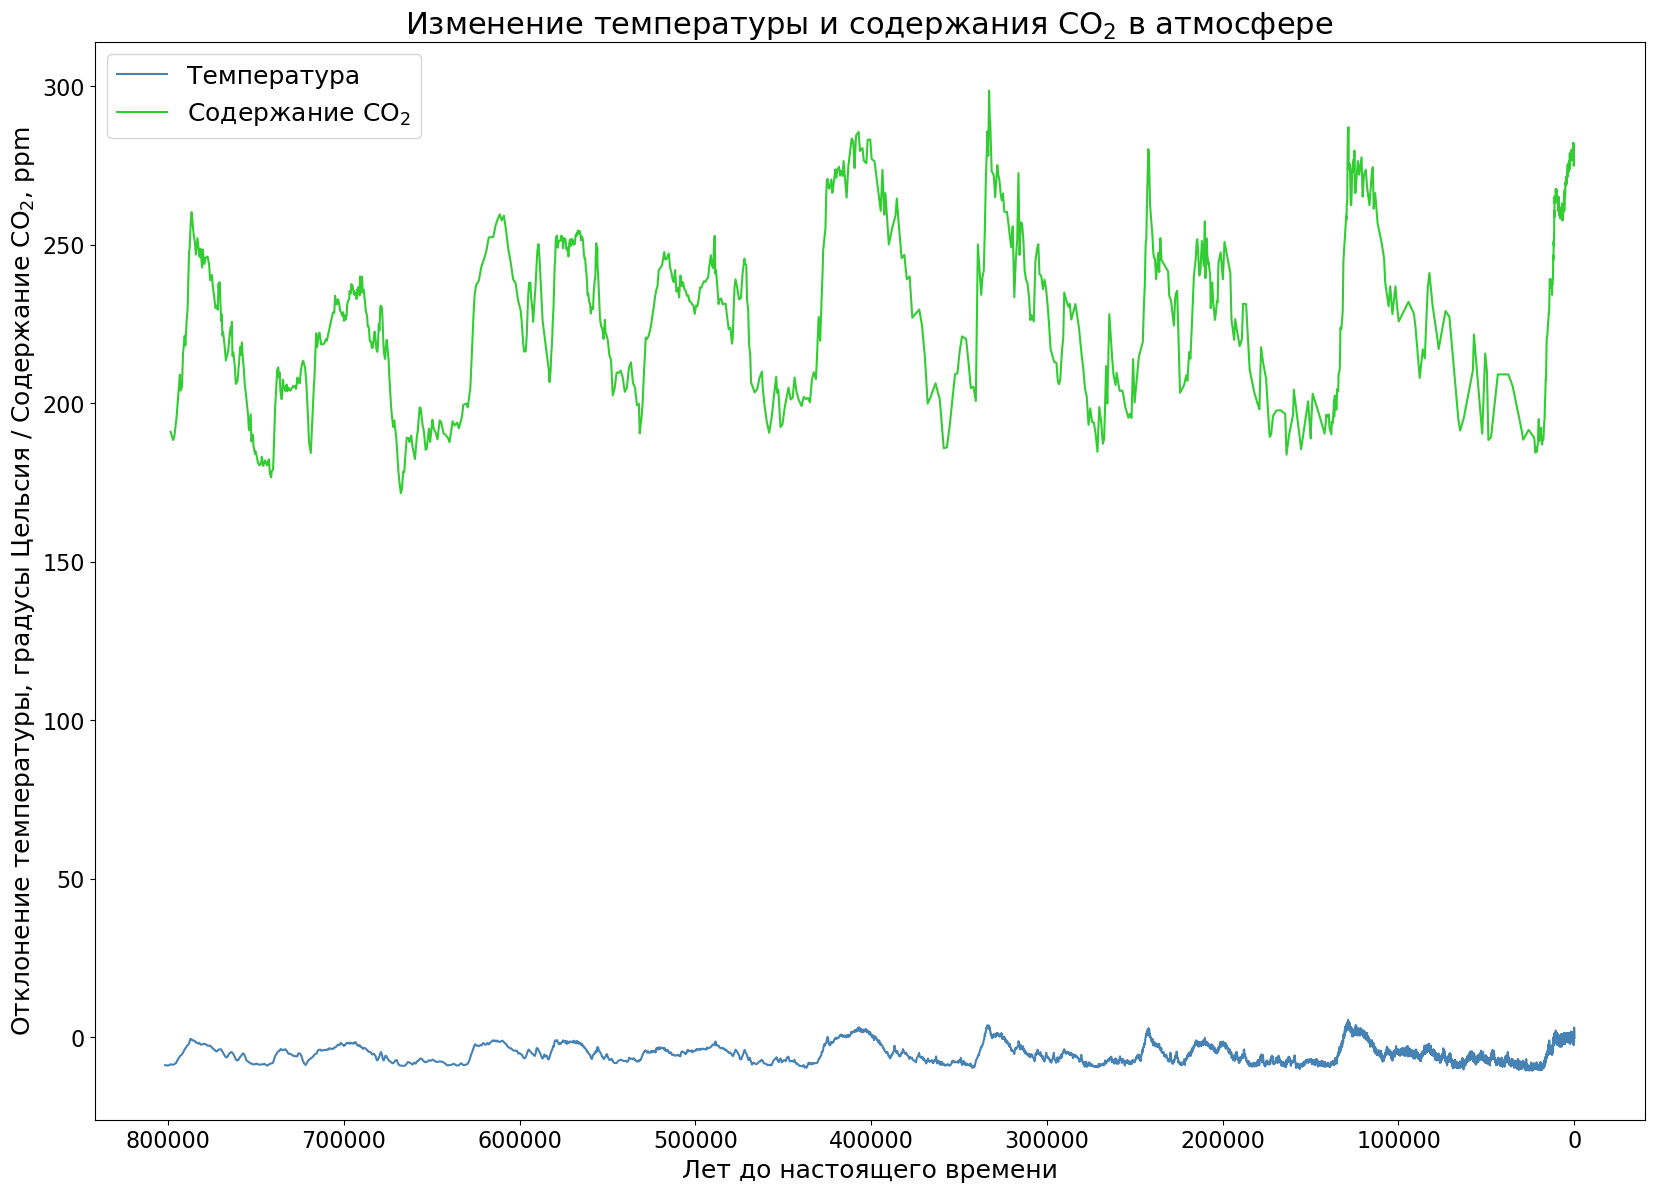

In [29]:
plt.figure(figsize=(20,14))
plt.plot(age, temp, color = 'steelblue') 
plt.plot(ageBP_1, CO2, color = 'limegreen') 

plt.title('Изменение температуры и содержания CO$_2$ в атмосфере', fontsize=22) 
plt.xlabel('Лет до настоящего времени', fontsize=18)
plt.ylabel('Отклонение температуры, градусы Цельсия / Содержание CO$_2$, ppm', fontsize=18)
plt.legend(['Температура', 'Содержание CO$_2$'], fontsize=18)
plt.gca().tick_params(labelsize=16)
plt.gca().invert_xaxis()

Сравнение графиков:
>Увеличение концентрации СО$_2$ в атмосфере приводи к повышению глобальной температуры, поскольку СО$_2$ - это парниковый газ, который способен удерживать тепло в атмосфере, что приводит к увеличению средней температуры. например, фактором значительной концентрации углекислого газа в теплые эпохи можно назвать дыхание живых существ

## 4 часть

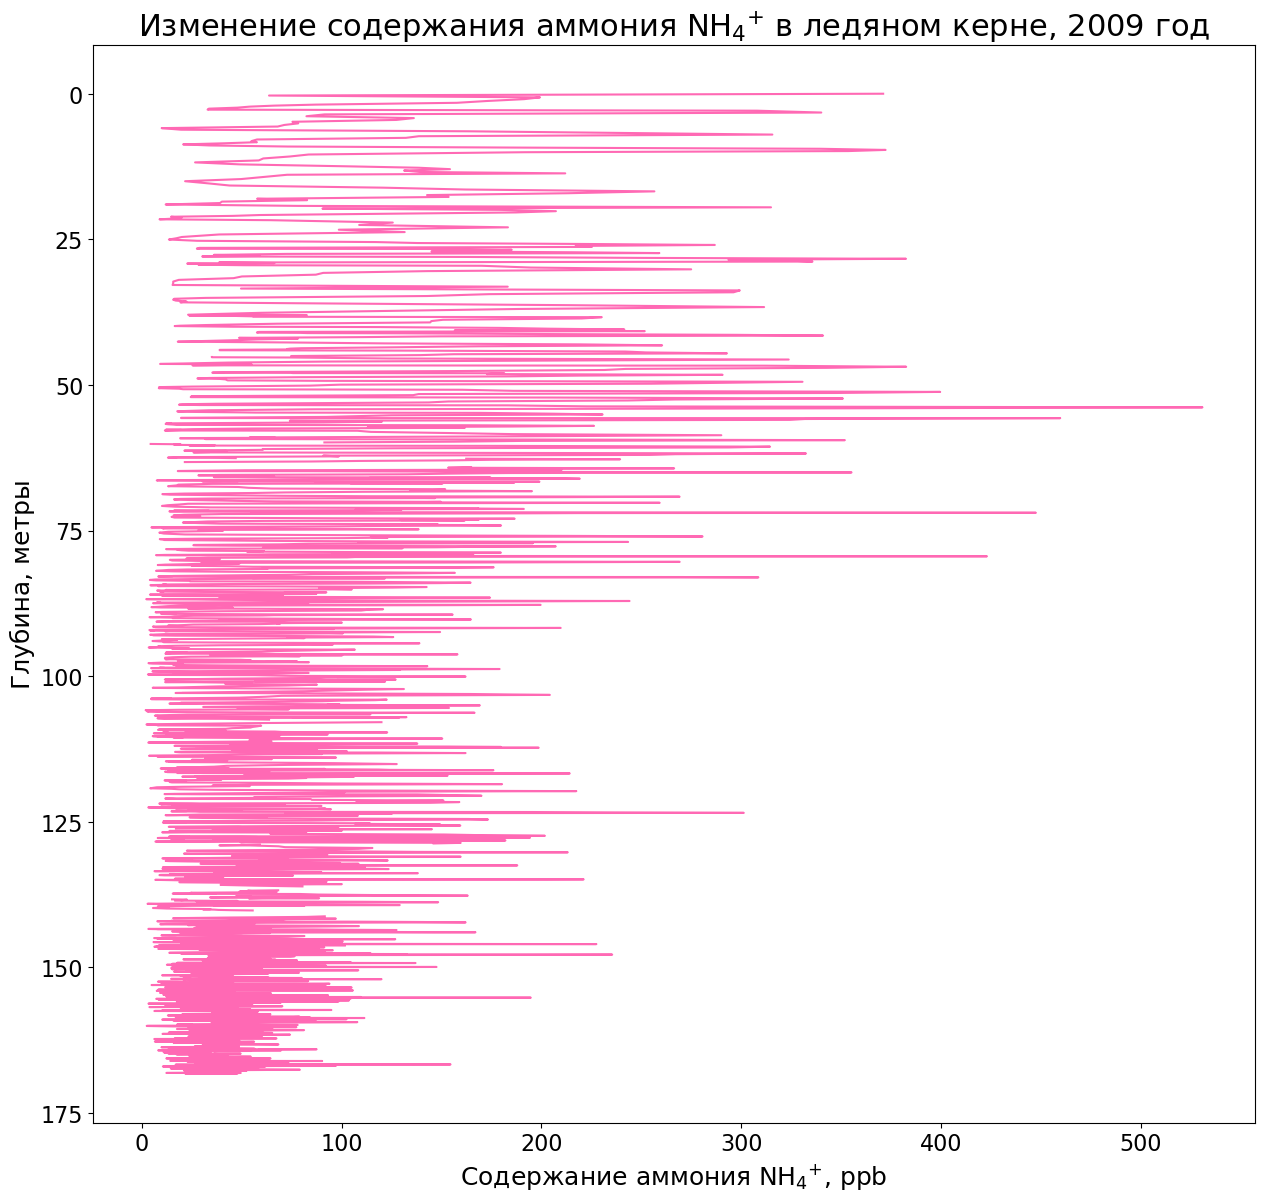

In [30]:
depth, depth_b, depth_t, depth_bot, nh4, ca, no3, so4 = np.loadtxt('data/Elbrus_raw_data.txt', unpack=True) 

plt.figure(figsize=(15,14))
plt.plot(nh4, depth, color = 'hotpink') 

plt.title('Изменение содержания аммония NH$_4$$^{+}$ в ледяном керне, 2009 год', fontsize=22) 
plt.xlabel('Содержание аммония NH$_4$$^{+}$, ppb ', fontsize=18)
plt.ylabel('Глубина, метры', fontsize=18)
plt.gca().tick_params(labelsize=16)
plt.gca().invert_yaxis()

Определите в каком году сформировался горизонт на глубине 35.8-35.9 м.
> Согласно сравнению средних летних значений NH$_4$$^{+}$ и изменения содержания NH$_4$$^{+}$ в ледяном керне получаем 1989 год

> Если оценивать год только по графику содержания NH$_4$$^{+}$, учитывая сезонные колебания, то получается 1994-1995 год

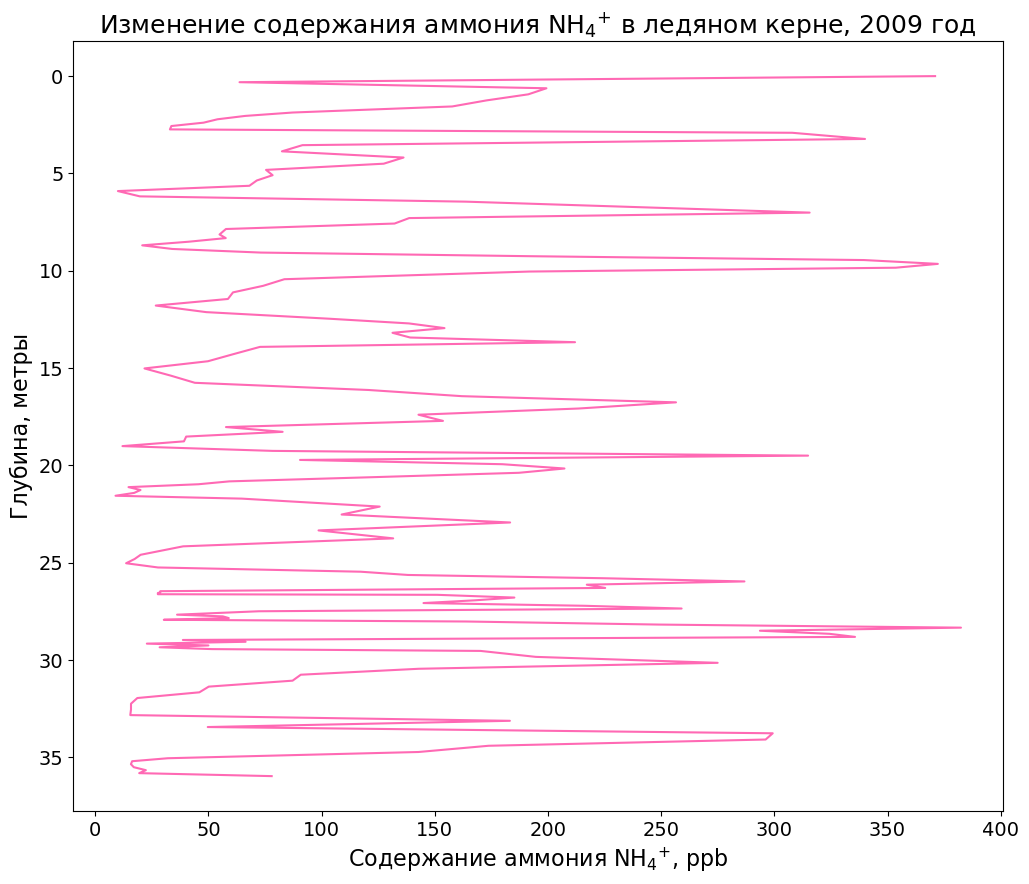

In [31]:
mask = depth < 36
plt.figure(figsize=(12,10))
plt.plot(nh4[mask], depth[mask], color = 'hotpink') 

plt.title('Изменение содержания аммония NH$_4$$^{+}$ в ледяном керне, 2009 год', fontsize=18) 
plt.xlabel('Содержание аммония NH$_4$$^{+}$, ppb ', fontsize=16)
plt.ylabel('Глубина, метры', fontsize=16)
plt.gca().tick_params(labelsize=14)
plt.gca().invert_yaxis()

Чем отличаются глубины? 
> Глубина в метрах - реальная глубина отложений, отсчитываемая от поверхности. Глубина в метрах водного эквивалента - то, сколько метров воды эквивалентно массе, то есть объем льда равен объему воды, которая заняла бы такое же пространство. Глубина в водном эквиваленте меньше глубины в метрах, так как лед имеет меньшую плотность, чем вода, а значит занимает больший объем.

До какой глубины сезонный сигнал легко читается?
> До ~120 метров. Далее измерения становятся более шумными, а также присутствуют различные выбросы, из-за чего сезонность выделяется хуже.

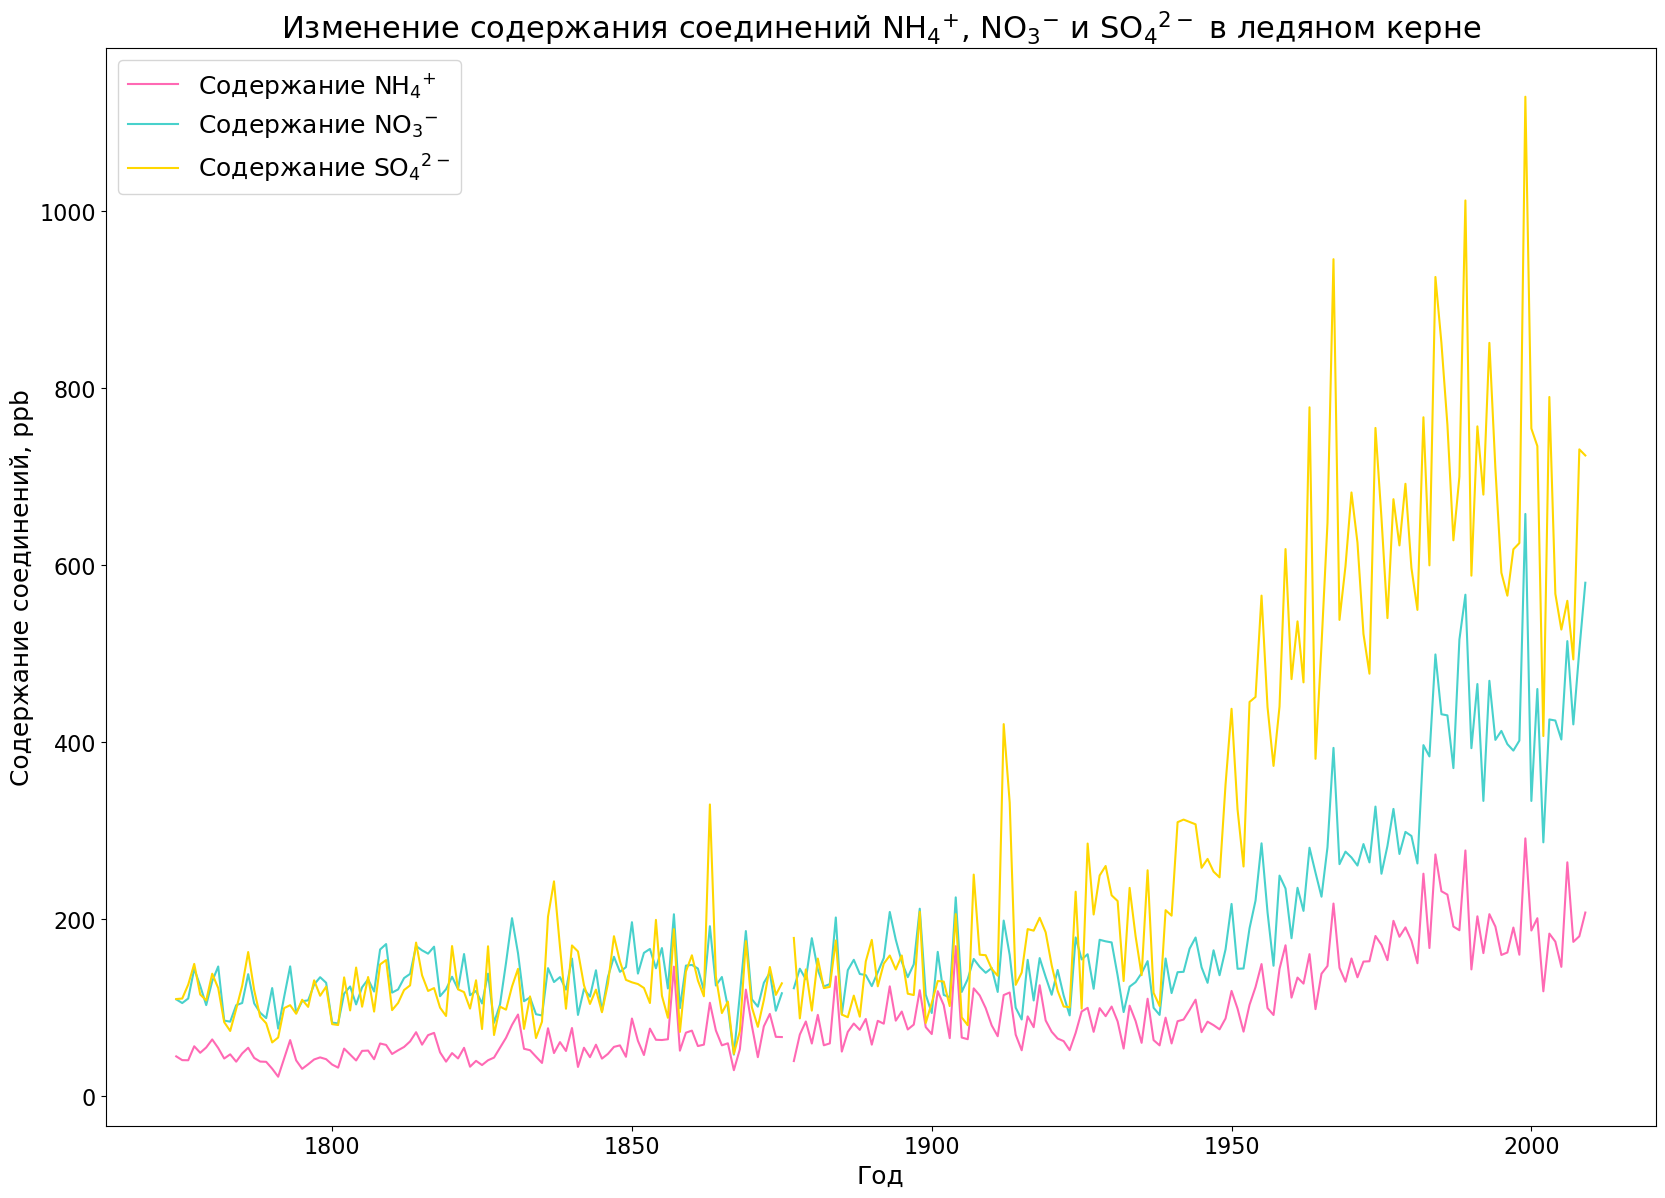

In [32]:
year, nh4_1, no3_1, so4_1 = np.loadtxt('data/Elbrus_annual_summer.txt', unpack=True) 

plt.figure(figsize=(20,14))
plt.plot(year, nh4_1, color = 'hotpink') 
plt.plot(year, no3_1, color = 'mediumturquoise') 
plt.plot(year, so4_1, color = 'gold') 

plt.title('Изменение содержания соединений NH$_4$$^{+}$, NO$_3$$^{-}$ и SO$_4$$^{2-}$ в ледяном керне', fontsize=22) 
plt.xlabel('Год', fontsize=18)
plt.ylabel('Содержание соединений, ppb', fontsize=18)
plt.legend(['Содержание NH$_4$$^{+}$', 'Содержание NO$_3$$^{-}$', 'Содержание SO$_4$$^{2-}$'], fontsize=18)
plt.gca().tick_params(labelsize=16)

Для каждого соединения определите во сколько раз концентрация увеличилась в последние 20 лет по сравнению с доиндустриальным временем
> Концентрация NH$_4$$^{+}$ возросла в 4.4 раза; концентрация NO$_3$$^{-}$ возросла в 4 раза; концентрация SO$_4$$^{2-}$ возросла в 6.6 раз.

В какой период времени начался активный рост концентрации?
> Резкий рост начался в 1940-1950 года.

Предположите возможные причины
> Выбросы от производств, машин и других последствий индустриализации, активное использование азотных удобрений.

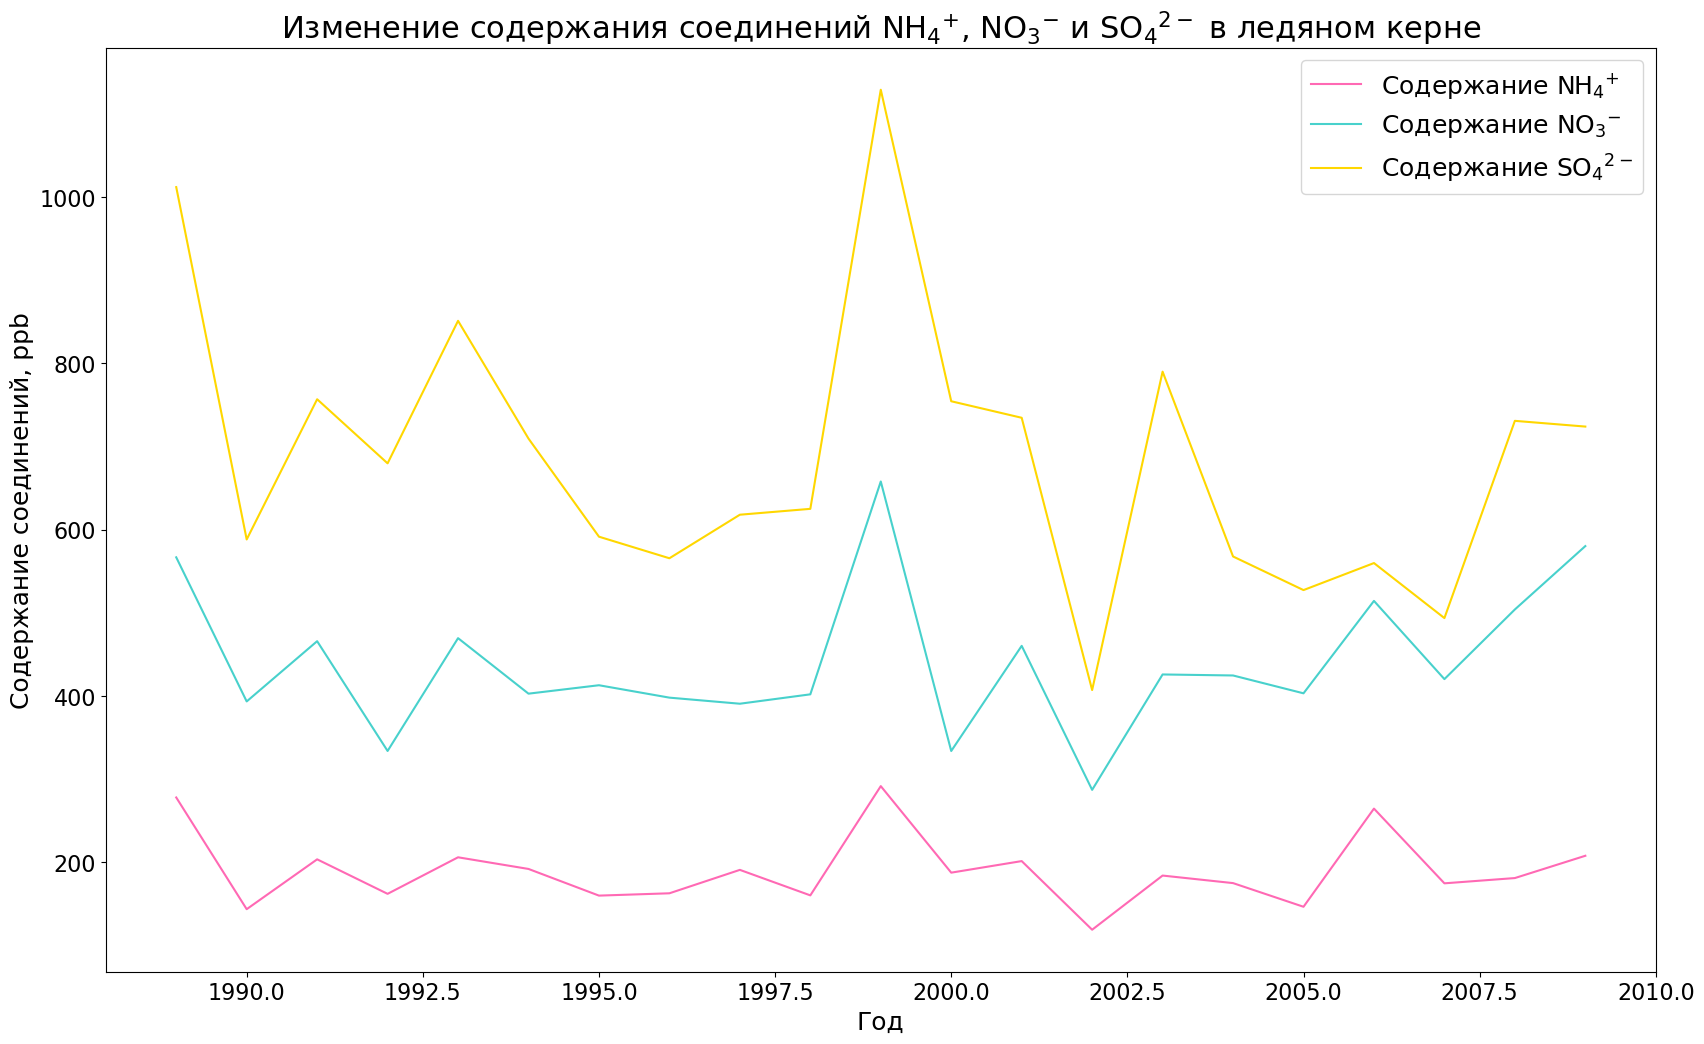

In [33]:
year, nh4_1, no3_1, so4_1 = np.loadtxt('data/Elbrus_annual_summer.txt', unpack=True) 

y20 = ((year >= 1989) & (year <= 2009))

plt.figure(figsize=(20,12))
plt.plot(year[y20], nh4_1[y20], color = 'hotpink') 
plt.plot(year[y20], no3_1[y20], color = 'mediumturquoise') 
plt.plot(year[y20], so4_1[y20], color = 'gold') 

plt.title('Изменение содержания соединений NH$_4$$^{+}$, NO$_3$$^{-}$ и SO$_4$$^{2-}$ в ледяном керне', fontsize=22) 
plt.xlabel('Год', fontsize=18)
plt.ylabel('Содержание соединений, ppb', fontsize=18)
plt.legend(['Содержание NH$_4$$^{+}$', 'Содержание NO$_3$$^{-}$', 'Содержание SO$_4$$^{2-}$'], fontsize=18)
plt.gca().tick_params(labelsize=16)

In [34]:
y20 = ((year >= 1989) & (year <= 2009))

masknh4 = sum(nh4_1[y20])/len(nh4_1[y20])
maskno3 = sum(no3_1[y20])/len(no3_1[y20])
maskso4 = sum(so4_1[y20])/len(so4_1[y20])

y18 = ((year >= 1780) & (year <= 1800))

masknh41 = sum(nh4_1[y18])/len(nh4_1[y18])
maskno31 = sum(no3_1[y18])/len(no3_1[y18])
maskso41 = sum(so4_1[y18])/len(so4_1[y18])

print('Концентрация NH4 возросла в', masknh4/masknh41, 'раз; концентрация NO3 возросла в ', maskno3/maskno31, 'раз; концентрация SO4 возросла в', maskso4/maskso41, 'раз')

Концентрация NH4 возросла в 4.396715791366125 раз; концентрация NO3 возросла в  3.9781368450378185 раз; концентрация SO4 возросла в 6.600427892510625 раз
